In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score,r2_score

In [35]:
# Load data
from google.colab import drive

drive.mount('/content/drive')

path = "/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
df= pd.read_csv(path)

In [202]:
# Define the filters data only for Canada location
condition1 = 'North America' 
condition2 = 'Canada'
# Filter the data
df1 = df.loc[(df['Continent'] == condition1) & (df['Location'] == condition2)]

#Taking date as index for timeseries

In [203]:
# time series
df1["Date"] = pd.to_datetime(df1["Date"])
df1 = df1.set_index("Date")

<ipython-input-203-e7d1088da38a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Date"] = pd.to_datetime(df1["Date"])


In [204]:
# subtract 7 records as in USA there are less rows
#df1 = df1[:int(len(df1)-7)]
df1 = df1.dropna()
#X=df1.drop(['Date','New cases smoothed','Continent','Location','tests units'], axis=1)
X_Canada=df1.drop(['Continent','Location','tests units','total boosters per hundred','weekly hosp admissions','weekly icu admissions','population','population density','median age','aged 65 older','aged 70 older','extreme poverty','cardiovasc death rate','diabetes prevalence','female smokers','male smokers','hospital beds per thousand','life expectancy'], axis=1)
#X=X.iloc[:-19931]
X_Canada.shape

(773, 33)

In [205]:
#commented below

In [206]:
# subtract 7 records as in USA there are less rows
#df1 = df1[:int(len(df1)-7)]
#df1 = df1.dropna()
#X=df1.drop(['Date','New cases smoothed','Continent','Location','tests units'], axis=1)
#X_Canada=df1.drop(['Date','Continent','Location','tests units'], axis=1)
#X=X.iloc[:-19931]
#X_Canada.shape

In [207]:
y_Canada = df1['New cases smoothed']
y_Canada.shape

(773,)

In [208]:
#Splitting the dataset into train and testing
from sklearn.model_selection import train_test_split
X_train_CAN,X_test_CAN, y_train_CAN, y_test_CAN = train_test_split(X_Canada,y_Canada,test_size=0.40)
print(X_train_CAN.shape, X_test_CAN.shape,y_train_CAN.shape,y_test_CAN.shape)

(463, 33) (310, 33) (463,) (310,)


In [209]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,random_state=42)

In [210]:
#fit the Canada Train model
fit_model = model.fit(X_train_CAN, y_train_CAN)

#**prediction on the training data**

In [211]:
#prediction  on the training dataset
y_train_pred_Canada = fit_model.predict(X_train_CAN)

In [212]:
print('The r_sq is: %.2f'% r2_score(y_train_CAN, y_train_pred_Canada))
print('The MAE is: %.2f' % mean_absolute_error(y_train_CAN,y_train_pred_Canada))
print('The MSE is: %.2f' % mean_squared_error(y_train_CAN,y_train_pred_Canada))
print('The RMSE  is: %.2f' % np.sqrt(mean_squared_error(y_train_CAN,y_train_pred_Canada)))
print('The EVS  is: %.2f' % np.sqrt(explained_variance_score(y_train_CAN,y_train_pred_Canada)))

The r_sq is: 1.00
The MAE is: 41.33
The MSE is: 52951.63
The RMSE  is: 230.11
The EVS  is: 1.00


#**prediction  on the testing dataset**

In [213]:
y_test_pred_Canada = fit_model.predict(X_test_CAN)

In [214]:
print('The r_sq is: %.2f'% r2_score(y_test_CAN, y_test_pred_Canada))
print('The MAE is: %.2f'% mean_absolute_error(y_test_CAN, y_test_pred_Canada))
print('The MSE is: %.2f'% mean_squared_error(y_test_CAN, y_test_pred_Canada))
print('The RMSE is: %.2f'% np.sqrt(mean_squared_error(y_test_CAN, y_test_pred_Canada)))
print('The EVS is: %.2f'% explained_variance_score(y_test_CAN, y_test_pred_Canada))

The r_sq is: 1.00
The MAE is: 60.32
The MSE is: 49481.01
The RMSE is: 222.44
The EVS is: 1.00


#**Training and Testing Score**

In [215]:
print("Trainig Score:", fit_model.score(X_train_CAN, y_train_CAN))
print("Testing Score:", fit_model.score(X_test_CAN , y_test_CAN))

Trainig Score: 0.9988262740053487
Testing Score: 0.998711650242055


#**Accuracy for Canada Prediction**

In [216]:
print("Accuracy =", r2_score(y_test_CAN, y_test_pred_Canada))

Accuracy = 0.998711650242055


#**Plot Observed vs Predicted value of Canada**

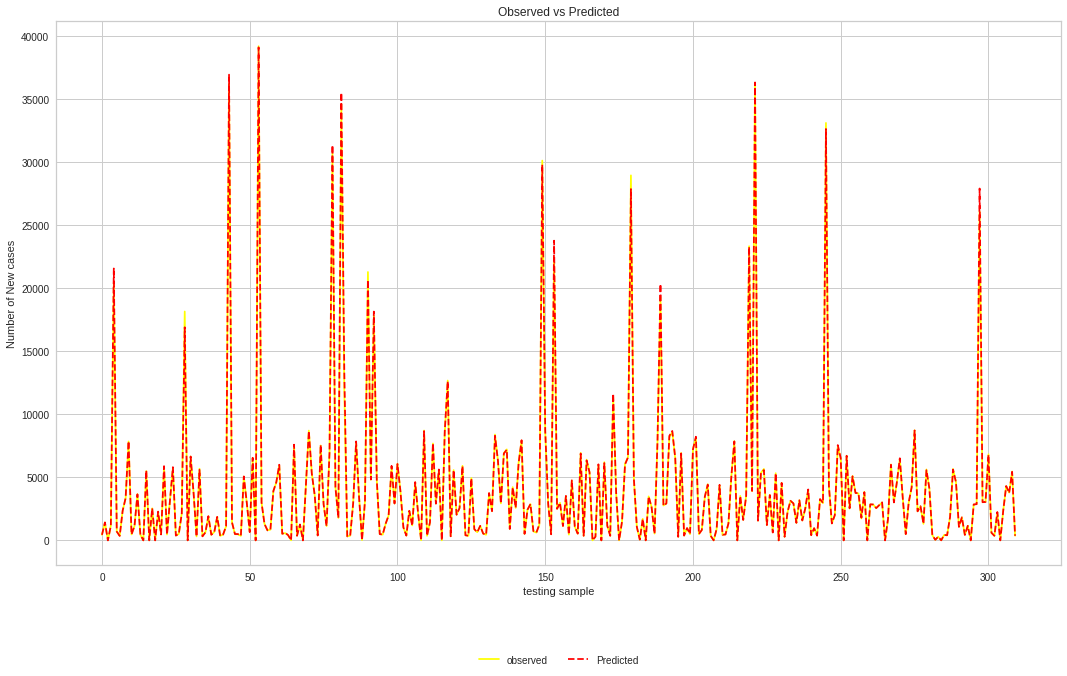

In [235]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18,10]
x_ax=range(len(X_test_CAN))

#plot
plt.plot(x_ax,y_test_CAN, label='observed',color='yellow', linestyle='-')
plt.plot(x_ax,y_test_pred_Canada, label='Predicted',color='red' ,linestyle='--')
plt.ylabel('Number of New cases')
plt.xlabel('testing sample')
plt.title("Observed vs Predicted")
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol=2, frameon = False)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


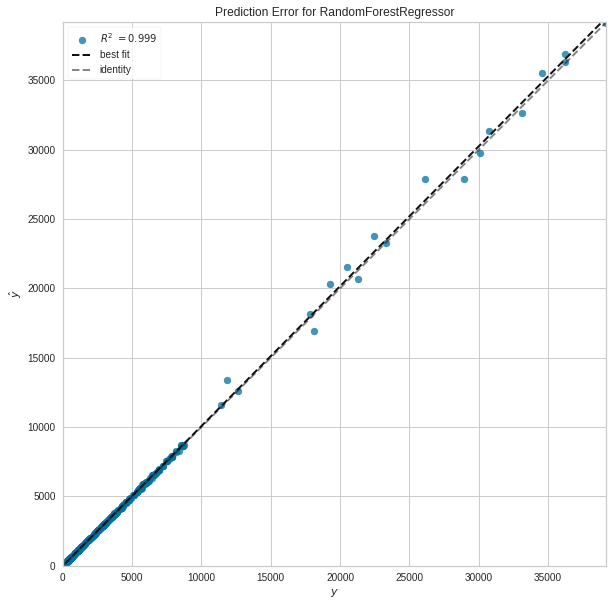

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [218]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(fit_model)
visualizer.fit(X_train_CAN, y_train_CAN)
visualizer.score(X_test_CAN,y_test_CAN)
visualizer.poof()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


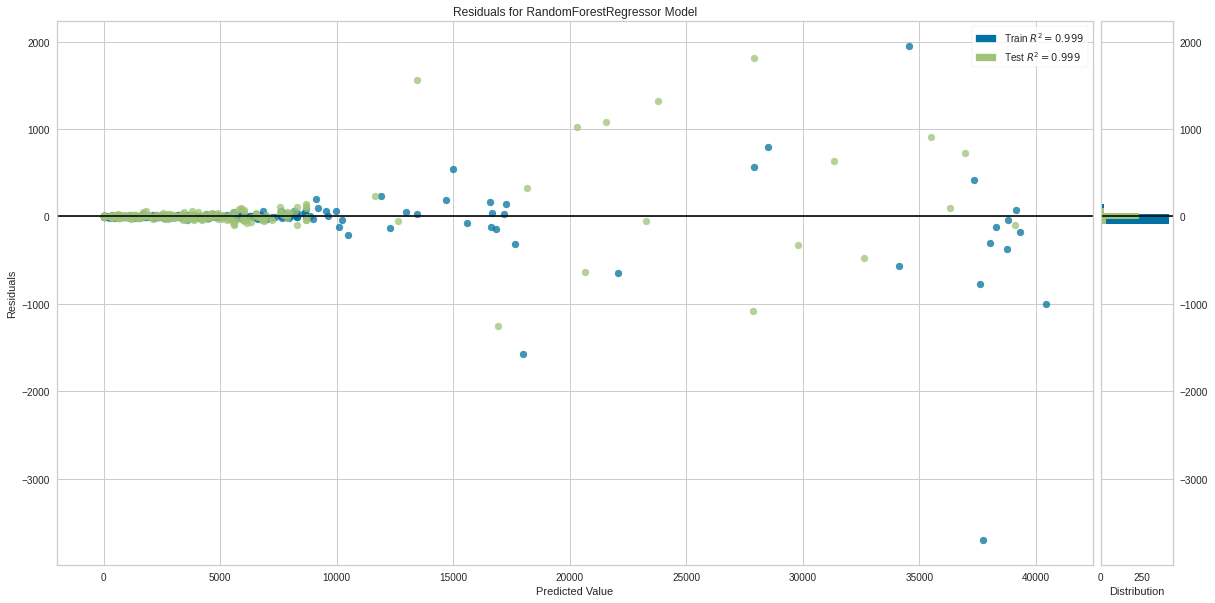

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [219]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(fit_model)
visualizer.fit(X_train_CAN, y_train_CAN)
visualizer.score(X_test_CAN,y_test_CAN)
visualizer.poof()

#**Cross validation score**

In [220]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Generate some example data
X = X_train_CAN
y = y_train_CAN

# Define the number of folds
k = 2

# Define the model to be used
model = RandomForestRegressor(n_estimators=100)

# Define the cross-validation method
kf = KFold(n_splits=k)

# Perform k-fold cross-validation
scores = cross_val_score(model, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", scores)


Cross-validation scores: [0.9777098  0.97784415]


#**Important features**

In [221]:
#!pip install --upgrade scikit-learn
from sklearn.pipeline import Pipeline
#!pip install sklearn


f_list=list(X_Canada.columns)
f_importance = pd.Series(fit_model.feature_importances_, index=f_list).sort_values(ascending= False)
print(f_importance)

New cases smoothed                            0.919120
New Cases                                     0.031634
positive rate                                 0.022651
new cases per million                         0.008473
new tests smoothed per thousand               0.007326
tests per case                                0.001901
total boosters                                0.001418
hosp patients per million                     0.000777
reproduction rate                             0.000738
hosp patients                                 0.000710
new deaths smoothed                           0.000690
people vaccinated per hundred                 0.000513
new tests smoothed                            0.000386
icu patients                                  0.000335
total vaccinations                            0.000288
total vaccinations per hundred                0.000281
new tests                                     0.000248
new people vaccinated smoothed per hundred    0.000240
people ful